In [1]:
import numpy as np
import pandas as pd

## This script is used to create a bar chart with shape/color sensitivity scores and std_error values from a RDM.
1. The user should first create the RDM and save the csv file before using this script.<br>
2. To create RDM and save its csv file, use RDMs.ipynb notebook first.

In [3]:
class RDM_Evaluator_VisualBinding:
    def __init__(
        self,
        csv_file,
    ):
        self.csv_file = csv_file
        self.df = self._load_file()
        self.rows, self.cols = self.df.shape

        
    def _load_file(self,):
        df = pd.read_csv(self.csv_file, header=None)
        return df
    
    def eval_color(self,):
        # list to store values from RDM cells
        self.colors = []
        # index at which a new shape is available in the RDM grid
        save_index = [0,4,8,12]
        # after every 4 rows, reset the variable for the next shape
        increment=-1

        for j in range(0,self.rows):
            if j%4 == 0 and j!=0: # i.e. encountered a new shape
                increment = -1 # reset the variable
            increment+=1
            for i in save_index:
                i+=increment
                cell = self.df[j][i]
                self.colors.append(self.df[j][i])
        
        # return avg value - 
        self.avg = round(sum(self.colors) / len(self.colors),6)
        return self.avg
        
    
    def eval_shape(self,):
        # list to store values from RDM cells based on conditions
        self.shapes = []
        
        # iterate through the entire RDM matrix and store value based on conditions
        for i in range(self.rows):
            for j in range(self.cols):

                # cond 1 - circle shape values
                if i<=3 and j<=3:
                    self.shapes.append(self.df[i][j])

                # cond 2 - triangle shape values
                if 3<i<8 and 3<j<8:
                    self.shapes.append(self.df[i][j])

                # cond 3 - trapezoid shape values
                if 7<i<12 and 7<j<12:
                    self.shapes.append(self.df[i][j])

                # cond 4 - mountain shape values
                if 11<i<16 and 11<j<16:
                    self.shapes.append(self.df[i][j])
        
        # return avg value - 
        self.avg = round(sum(self.shapes) / len(self.shapes),6)
        return self.avg
    
    def standard_error(self, values):
        # Convert the list to a numpy array
        values_array = np.array(values)

        # Calculate the standard error
        # ddof=1 represents std_deviation across samples instead of population
        std_error = np.std(values_array, ddof=1) / np.sqrt(len(values))
        
        return std_error

In [326]:
# load file
csv_file = '/data/lpandey/LOGS/CSV_FILES/paper_UTAustin_NatHumBeh/Exp2/vit9h_gsAug_video3_seed2_similarityMatrix.csv'
rdm_eval = RDM_Evaluator_VisualBinding(csv_file=csv_file)
# display csv file as dataframe
#rdm_eval.df

In [327]:
# calculate shape and color scores
score_shape = rdm_eval.eval_shape()
score_color = rdm_eval.eval_color()

# calculate standard error for shape and color
stdErr_shape = rdm_eval.standard_error(rdm_eval.shapes)
stdErr_color = rdm_eval.standard_error(rdm_eval.colors)

# display results
print("Color Score is : {} and Std_Error is : {}".format(score_color,stdErr_color))
print("Shape Score is : {} and Std_Error is : {}".format(score_shape,stdErr_shape))

Color Score is : 0.25875 and Std_Error is : 0.06317316055324218
Shape Score is : 0.699688 and Std_Error is : 0.036511419684272906


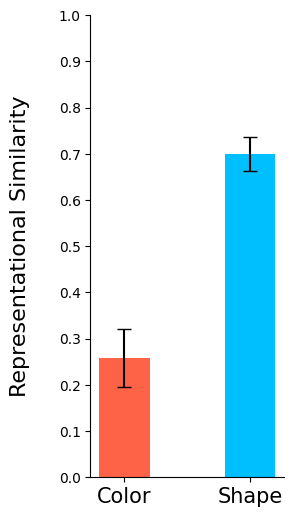

In [328]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = ("Color", "Shape")
acc = {
    'scores': (score_color, score_shape)
}
std_errors = {
    'scores': (stdErr_color, stdErr_shape)
}

x = np.arange(len(x_axis))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(2.5, 6))  # width x height

# Manually specify colors for each bar
colors = ['tomato', 'deepskyblue']

# Plot the bars
rects1 = ax.bar(x, acc['scores'], width, label='scores', color=colors, yerr=std_errors['scores'], capsize=5)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xticks(x)  # Set the tick positions to the center of each bar
ax.set_xticklabels(x_axis, rotation=0, ha='center', fontsize=15)  # Center-align the tick labels


y_tick_locs = np.arange(0, 1.1, 0.1)
ax.set_yticks(y_tick_locs)

# Set the y-axis label
ax.set_ylabel('Representational Similarity\n', fontsize=16)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
